# More Classification & Evaluation

In this exercise we will look at Decison Trees.

## Decision Tree Classification
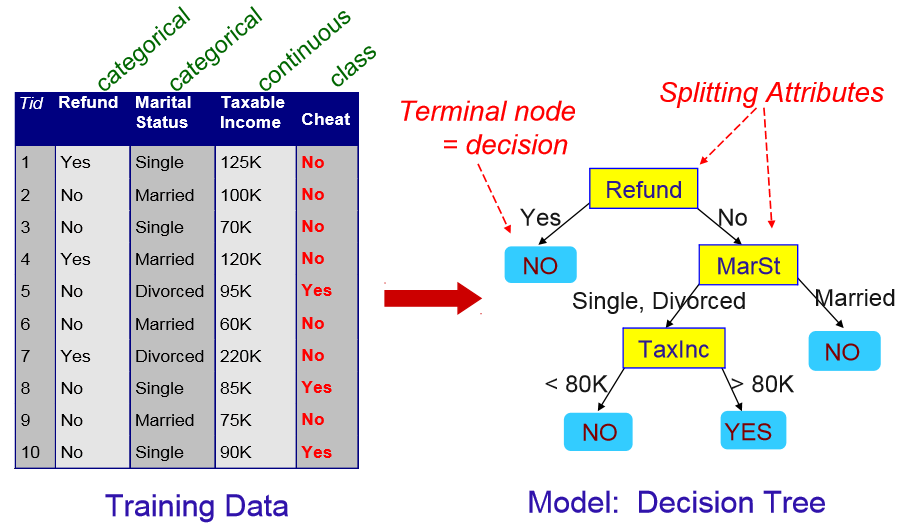

### Attribute Test Conditions
- Depend on attribute types
    - Nominal values: Each partition contains a set of values
    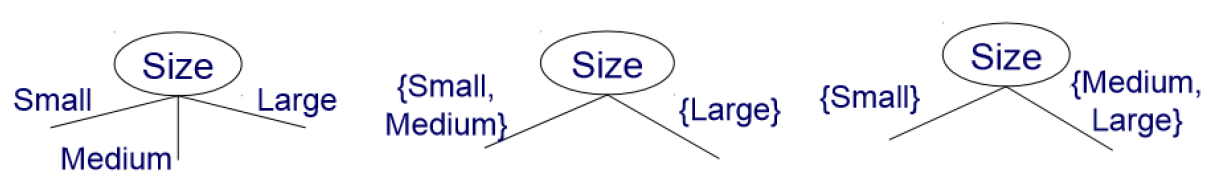
    - Continuous values: Each partition contains a range of values
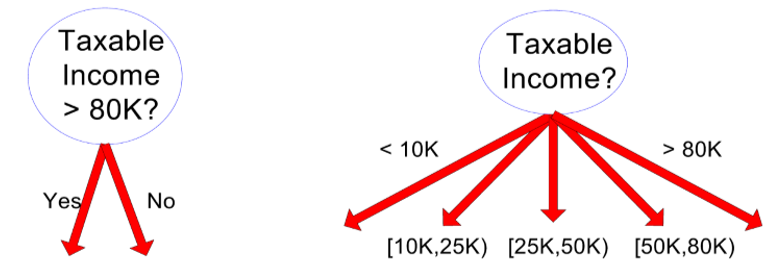

ranges (<80k) need to be determined!

### How to determine the best split?
- Measure the node impurity of the split
    - Gini Index
    - Information Gain
    - Gain Ratio
    - Classification Error
- The higher the measure, the less pure is the node
    - We want nodes to be as pure as possible
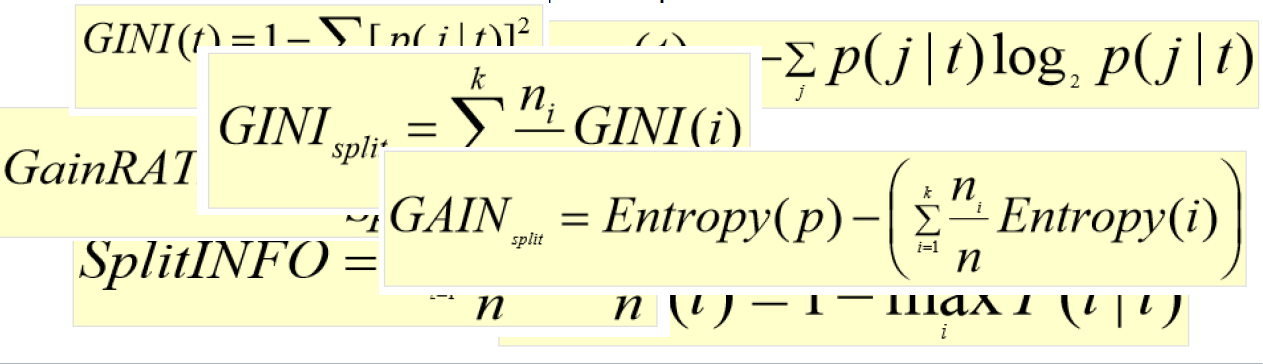

## Gini Index
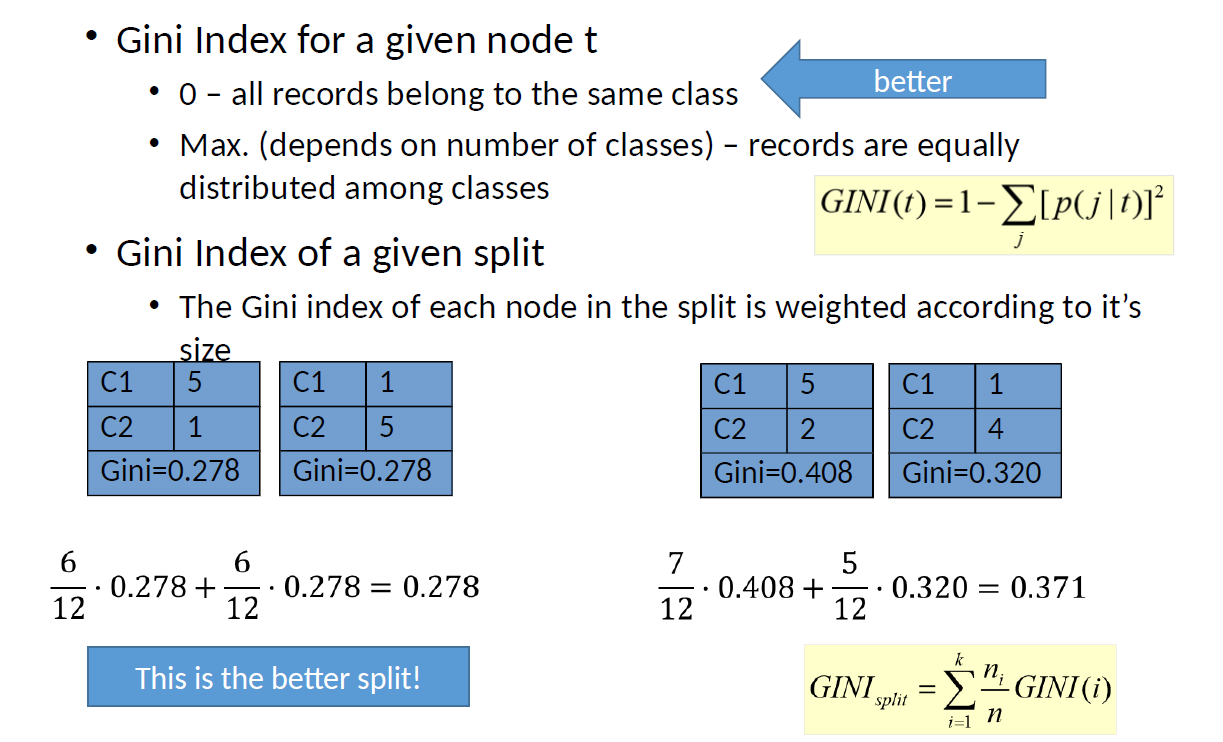

Last formuala = Gini split coefficient

## Decision Tree in Python

The decision tree classification is implemented in the [```DecisionTreeClassifier``` class](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) in scikit-learn.

Parameters:
- ```criterion```: ```'gini'``` (default) or ```'entropy'```
- ```max_depth```: maximum depth of the tree (default: unbounded)
- ```min_samples_leaf```: minimum number of examples in each leaf node (default 2)
- and many more ...


In [1]:
import pandas as pd
from sklearn import preprocessing

# load the data
iris = pd.read_csv("iris.csv")
iris_data = iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]

label_encoder = preprocessing.LabelEncoder()
iris_target = label_encoder.fit_transform(iris['Name'])

iris_data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(iris_data, iris_target)

DecisionTreeClassifier()

### Visualising the tree

As the decision tree classifier learns a model (other than the KNN classifier, which just stores all training data), we might be interested in looking at this model.

You can explore the learned tree by using the [.tree](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html) member or you can visualise the tree in a graphic as shown in the following code example. You will have to install the graphviz package (automatically done if you run the cell below) and the [graphviz software](https://graphviz.gitlab.io/download/).

In [1]:
#%pip install -q -U graphviz

import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=iris_data.columns, 
                                class_names=label_encoder.classes_,
                               filled=True, rounded=True, special_characters=True) 

graph = graphviz.Source(dot_data) 

display(graph)

NameError: name 'dt' is not defined

An alternative to plot the tree:

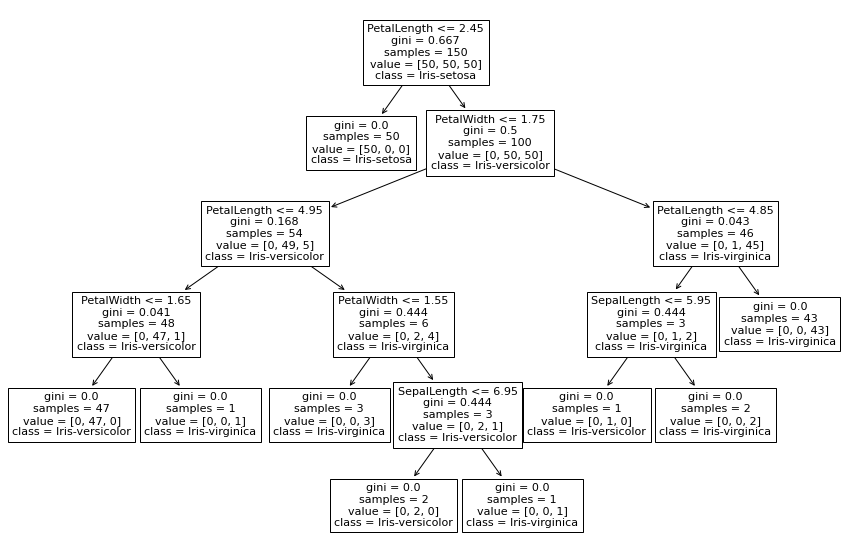

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(dt,
               feature_names=iris_data.columns, 
               class_names=label_encoder.classes_)
plt.show()

## [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier)

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

- usual parameters to optimize:
  - n_estimators (The number of trees in the forest)
  - criterion {“gini”, “entropy”}
  - max_depth
  - min_samples_split
  - min_samples_leaf

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=2, random_state=0)

cross_val_score(random_forest, iris_data, iris_target, cv=5, scoring="accuracy").mean()

0.9533333333333334

## [SVM ](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

- usual parameters to optimize:
  - choice of kernel: `linear`, `rbf`, ...
  - C (Regularization parameter)
  - gamma (Kernel coefficient) for `rbf`

In [6]:
from sklearn.svm import SVC
svm = SVC()
cross_val_score(svm, iris_data, iris_target, cv=5, scoring="accuracy").mean()

0.9666666666666666

## Recap

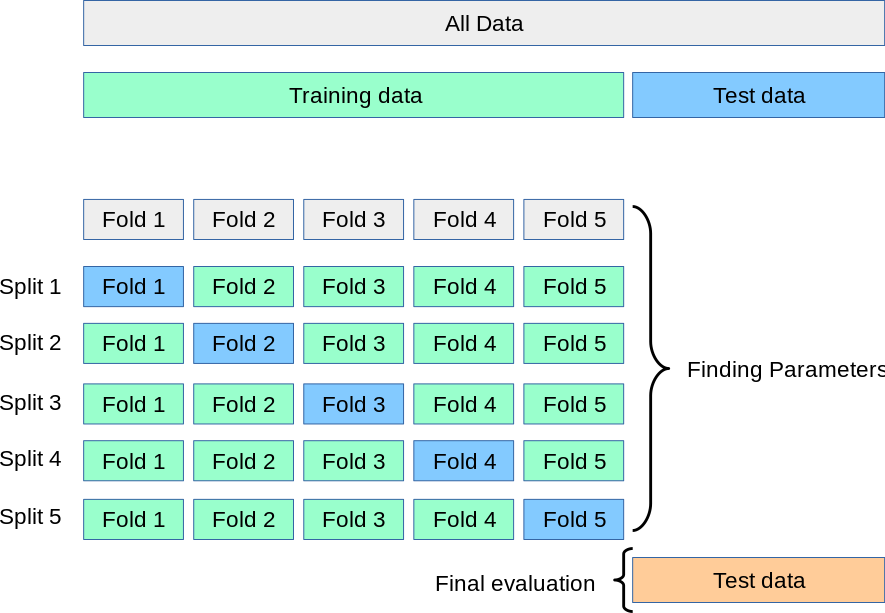

## Compute score with nested cross validation

The performance of each hyper-parameter setting is determined using cross validation.
But if we now select the best setting based on these results, we make a decision for a hyper-parameter setting based on the results on the used dataset.
Methodologically, this is the same situation as during fitting: the learning algorithm makes a decision for the model parameters based on the training split(s), and the grid search makes a decision for the hyper-parameters based on the test split(s).
This means, after choosing a hyper-parameter setting, we need to evaluate how good this decision performs on unseen data.
As in the model fitting case, we can do this either using a train/test split or using a [nested cross validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html).

If we use a train/test split, we run the grid search (and its internal cross validation) on the training set and evaluate our chosen model on the test set (by calling the ```predict()``` function of the grid search estimator).
If we use a nested cross validation, we run a cross validation using the grid search as estimator (which performs another cross validation internally).

Note: Remember that the ```cross_val_score()``` function only performs an evaluation and does not produce a model.
So if you want to create a model that you can apply to unseen data or want to know the selected parameters, you must call the ```fit()``` function of the estimator (in this case the grid search)!

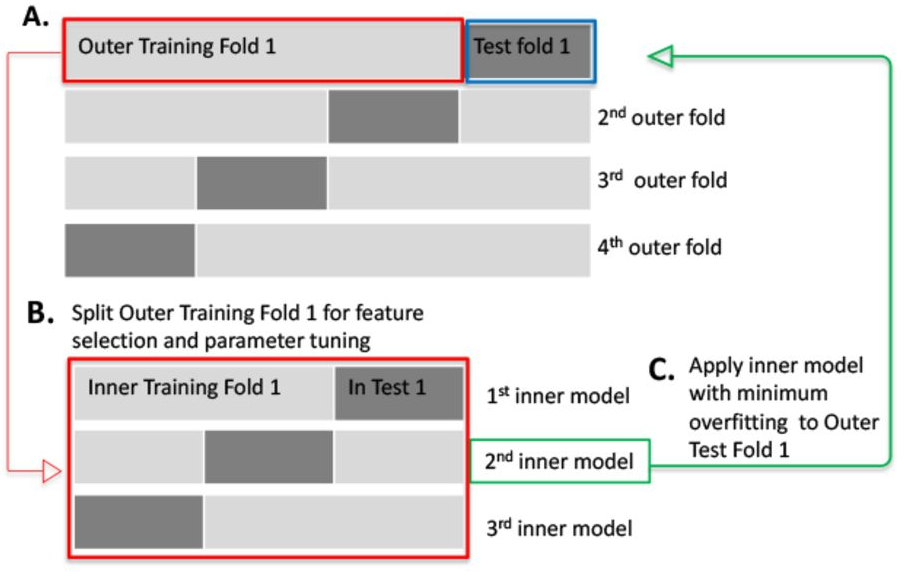

Outer validation best model from inner validation ()
Hyperparametertunigng, preprocessing on second training data (verschachteltes validatoin set)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

# create an estimator
knn_estimator = KNeighborsClassifier()

# specify the parameter grid
parameters = {
    'n_neighbors': range(2, 9)
}

# 5 Outer cv* 5 innter cv* 5 Hyperparameter validations (gridsearch) 

# create the grid search instance
grid_search_estimator = GridSearchCV(knn_estimator, parameters, scoring='accuracy', 
                                     cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

nested_cv_score = cross_val_score(grid_search_estimator, iris_data, iris_target, cv=5, scoring='accuracy')

display(nested_cv_score.mean())

# Now training and validating
grid_search_estimator.fit(iris_data,iris_target)
display(grid_search_estimator.best_params_)

0.9733333333333334

{'n_neighbors': 4}

## Classifier comparison on artificial data

[Code producing this image](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

[Larger image](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)
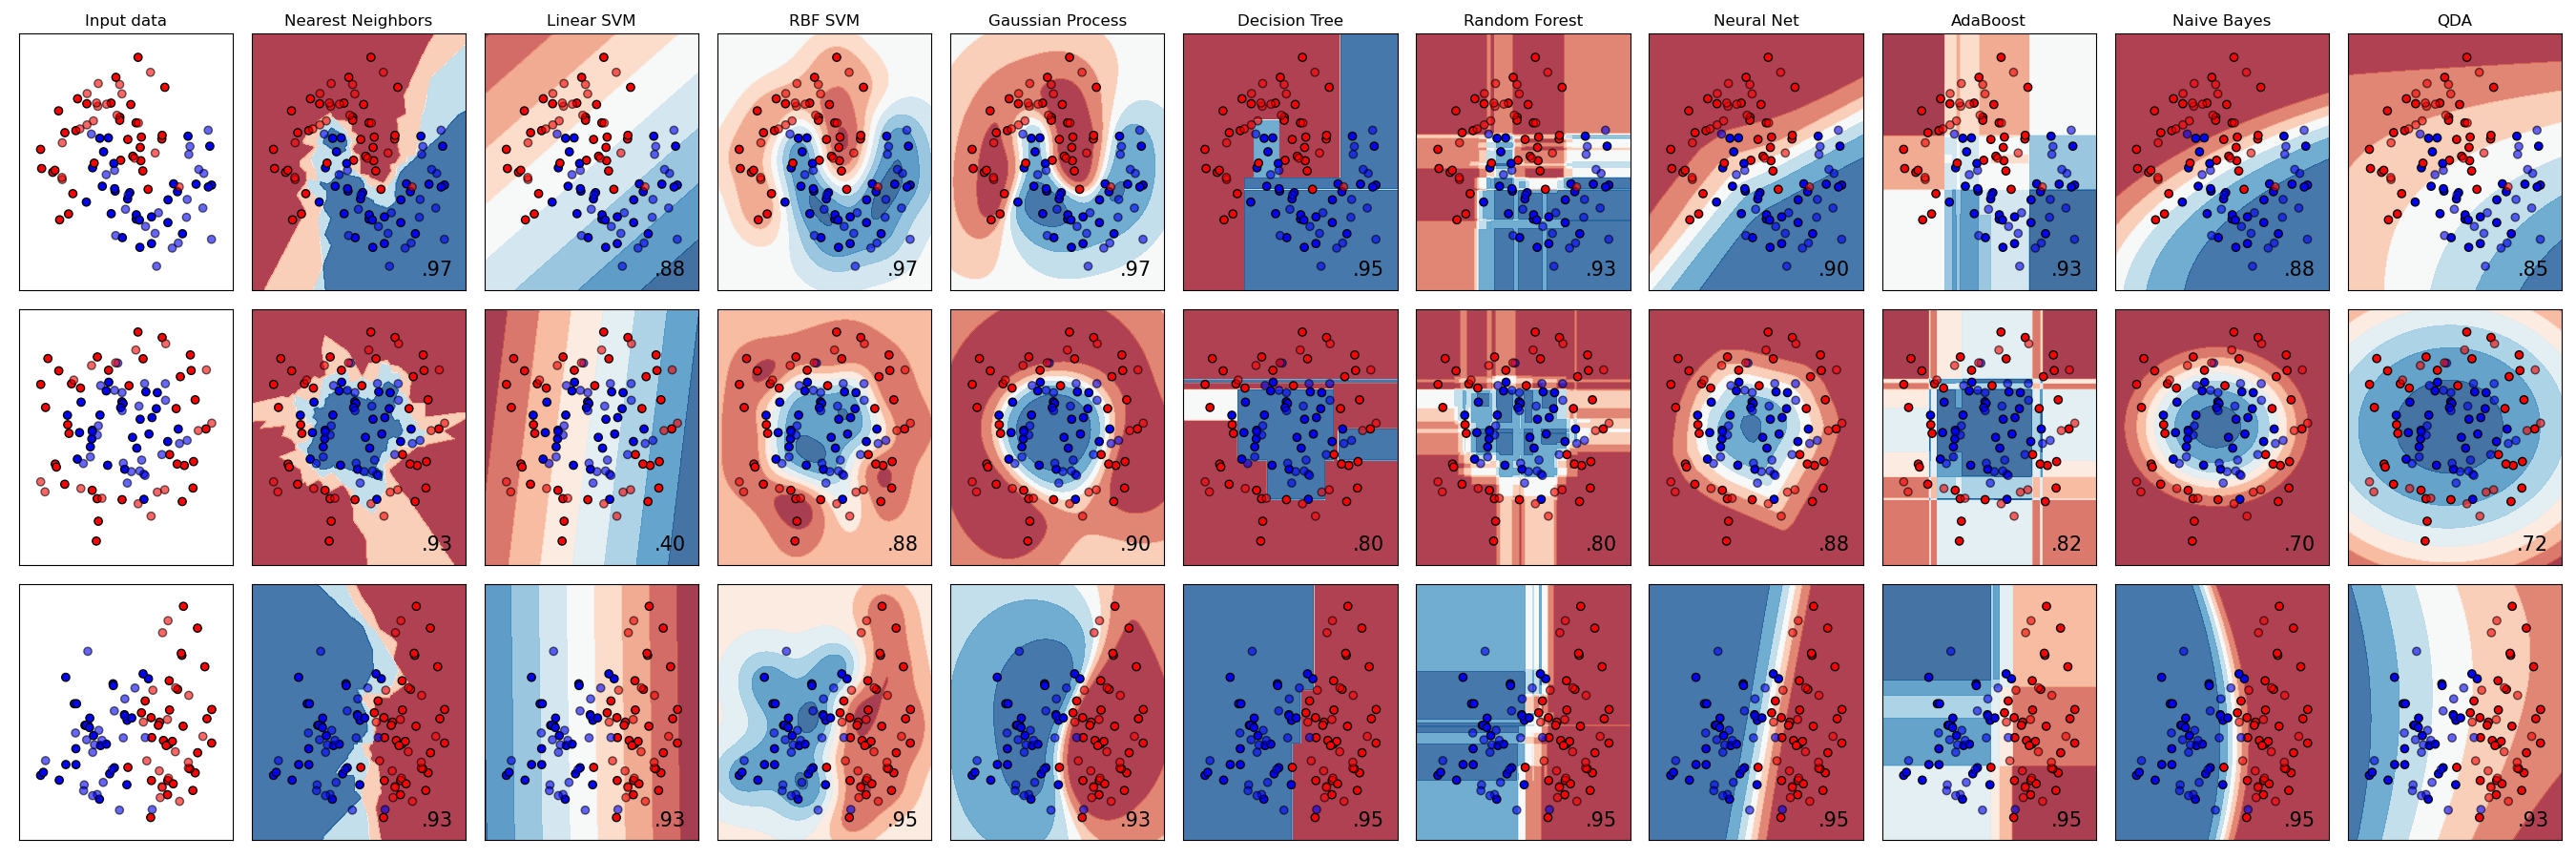